<div style="width: 95%; background-color: #fff87e; color: #0B638B; padding: 10px; border: 0px solid #243A73; margin-bottom: 20px;border-radius:10px; border: 2px solid black">

<h1>Spotify Data Analysis Using SQL & Python</h1>

<span>For business inquiries or collaboration requests, you can reach me at <span style="font-weight: bold; color: black;">peige77@gmail.com</span>

<p>This data set contains statistics on songs from spotify and was pulled directly from <a href='https://www.gigasheet.com/sample-data/spotify-dataset' style='font-weight:bold;'>gigsheet.com</a></p>

**Tools & Software utilized:**
- Microsoft SQL Server Management Studio (ELT, extract, load, transform)
- Python with JupyterLab (final minipulation and visualization)
- Excel (data visualization and dashboard creation)

**Project structure:**
- Project Objectives & Goals
- Data Collection, Extraction and Transformation
- Exploratory Data Analysis
- Excel & Tableau Dashboards
- Conclusions
</div>

<div style='background-color: #00296b; color: #ffffff; border-radius: 10px; border: 2px solid black; padding: 10px;'>
<h2>Project Objectives & Goals</h2>
    <ul>
        <li>Identify the top 10 most streamed albums</li>
        <li>Identify the top 10 most streamed singles</li>
        <li>Identify the top 10 most popular atrists based on streams</li>
        <li>Identify the top 5 most streamed songs from the top 10 artists</li>
        <li>Determine what variables <strong><i>(if any)</i></strong> have a direct impact on the number of streams a song receives</li>
    </ul>
</div>

<div style='background-color: #00296b; color: #ffffff; border-radius: 10px; border: 2px solid black; padding: 10px;'>
<h2>Data Collection, Extraction and Transformation</h2>
</div>

<div style='background-color:lightyellow; padding:10px'>
<p>This data set contains statistics on songs from spotify and was pulled directly from <a href='https://www.gigasheet.com/sample-data/spotify-dataset' style='font-weight:bold;'>gigsheet.com</a></p>
<p>Next a new database was created in Microsoft SQL Studio Management Server called "Spotify", from there our csv file was uploaded and our initial table was inspected for accuracy.</p>
<p>Finally we will use various python libaries in order to complete the SQL queries directly in our Jupyter Notebook. I've chosen to complete the project this was for several reasons. First and foremost its cool that this is even possible and second will make the flow of the project seamsless and easy to follow.</p>

In [182]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install pmdarima
!pip install pypyodbc

In [183]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pypyodbc as podbc

In [184]:
# Creating the connection to Microsoft SQL Server Management Studio
connect = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-112C6GV\SQLEXPRESS2019;"
                     "Database=Spotify;"
                     "Trusted_Connection=yes;")

query = pd.read_sql_query('''
SELECT *
FROM [Spotify].dbo.spotify
WHERE Album_type = 'single';
''', connect)

query.head()

,artist,track,album,album_type,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,title,channel,views,likes,comments,licensed,official_video,stream,energyliveness,most_playedon
0,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,63063467.0,7.956897,Spotify
1,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,-7.185,0.0629,0.012000,0.262000,...,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,False,True,10666154.0,2.760000,Spotify
2,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,-3.340,0.0465,0.003430,0.103000,...,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,True,True,42671901.0,2.809231,Spotify
3,50 Cent,Best Friend - Remix,Best Friend (Remix),single,0.545,0.640,-3.529,0.3080,0.368000,0.000000,...,50 Cent-Best Friend(Remix),Lightning,291023.0,5729.0,46.0,False,False,160037992.0,5.765766,Spotify
4,Metallica,Lux Æterna,Lux Æterna,single,0.386,0.996,-2.960,0.0754,0.000012,0.000836,...,Metallica: Lux Æterna (Official Music Video),Metallica,14937918.0,473751.0,46230.0,True,True,20061385.0,8.586207,Spotify


In [185]:
# Identifying the top 10 singles based on total streams
top10singles = pd.read_sql_query('''
WITH rankedsingles AS (
SELECT track,album_type,artist,MAX(stream) as total_streams,
ROW_NUMBER() OVER (PARTITION BY track ORDER BY MAX(stream) DESC) AS track_rank
FROM [Spotify].dbo.spotify
WHERE album_type = 'single'
GROUP BY track, album_type, artist
)
SELECT TOP 10
track,album_type,artist, total_streams
FROM RankedSingles
WHERE track_rank = 1
ORDER BY total_streams DESC;
''', connect)

top10singles

,track,album_type,artist,total_streams
0,Closer,single,The Chainsmokers,2.456205e+09
1,lovely (with Khalid),single,Khalid,2.110574e+09
2,Happier,single,Marshmello,1.798355e+09
3,One Kiss (with Dua Lipa),single,Dua Lipa,1.719434e+09
4,Don't Let Me Down,single,The Chainsmokers,1.649896e+09
5,See You Again (feat. Charlie Puth),single,Wiz Khalifa,1.521255e+09
6,Heathens,single,Twenty One Pilots,1.475768e+09
7,Old Town Road - Remix,single,Billy Ray Cyrus,1.393903e+09
8,This Is What You Came For,single,Rihanna,1.389244e+09
9,death bed (coffee for your head),single,beabadoobee,1.386081e+09


In [201]:
# Identify the top 10 most popular atrists based on streams
top10artists = pd.read_sql_query('''
SELECT TOP 10 artist, SUM(stream) as total_streams
FROM [Spotify]..spotify
GROUP BY artist
ORDER BY total_streams desc;
''', connect)

top10artists

,artist,total_streams
0,Post Malone,1.525126e+10
1,Ed Sheeran,1.439488e+10
2,Dua Lipa,1.340808e+10
3,XXXTENTACION,1.322435e+10
4,The Weeknd,1.303197e+10
5,Justin Bieber,1.209777e+10
6,Imagine Dragons,1.185831e+10
7,Coldplay,1.177848e+10
8,Khalid,1.138684e+10
9,Bruno Mars,1.089786e+10


In [217]:
# Determining the top 5 songs from the top 10 most streamed artists
rankedsongs = pd.read_sql_query('''
WITH RankedArtists AS (
SELECT artist, SUM(stream) AS total_streams,
ROW_NUMBER() OVER (ORDER BY SUM(stream) DESC) AS artist_rank
FROM [Spotify].dbo.spotify
GROUP BY artist
)
, 
RankedSongs AS (
SELECT artist,track,stream,
ROW_NUMBER() OVER (PARTITION BY artist ORDER BY stream DESC) AS song_rank
FROM [Spotify].dbo.spotify
)
SELECT
ra.artist AS artist,rs.track AS song,rs.stream AS total_streams,ra.artist_rank,rs.song_rank
FROM RankedArtists ra
JOIN RankedSongs rs ON ra.artist = rs.artist
WHERE ra.artist_rank <= 10 AND rs.song_rank <= 5
ORDER BY ra.artist_rank, rs.stream DESC;
''',connect)

rankedsongs

,artist,song,total_streams,artist_rank,song_rank
0,Post Malone,rockstar (feat. 21 Savage),2.594927e+09,1,1
1,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09,1,2
2,Post Malone,Circles,1.958827e+09,1,3
3,Post Malone,Better Now,1.694008e+09,1,4
4,Post Malone,Congratulations,1.685298e+09,1,5
5,Ed Sheeran,Shape of You,3.362005e+09,2,1
6,Ed Sheeran,Perfect,2.312690e+09,2,2
7,Ed Sheeran,Thinking out Loud,2.154334e+09,2,3
8,Ed Sheeran,Photograph,2.067689e+09,2,4
9,Ed Sheeran,Bad Habits,1.401518e+09,2,5


<div style='background-color: #00296b; color: #ffffff; border-radius: 10px; border: 2px solid black; padding: 10px;'>
<h2>Exploratory Data Analysis</h2>
</div>

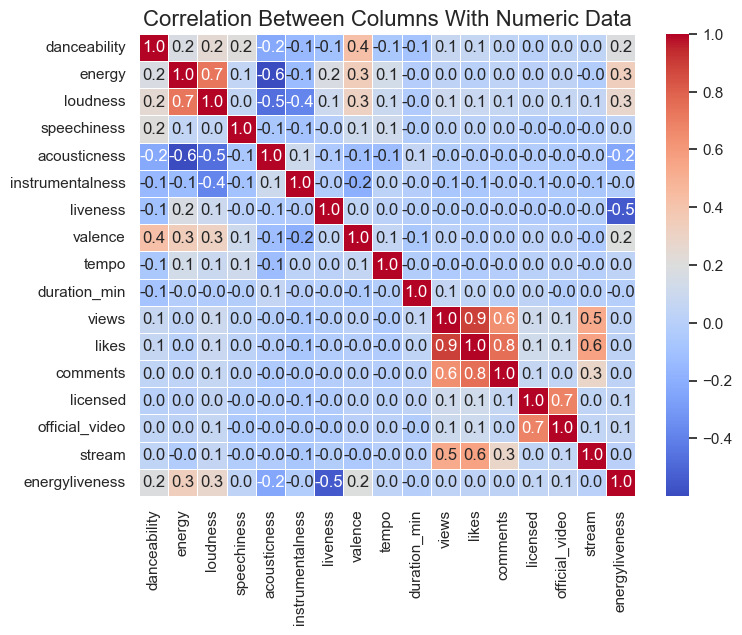

In [189]:
# Identifying correlations between numeric variables
sns.heatmap(query.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt=".1f", linewidth='.5')
plt.title('Correlation Between Columns With Numeric Data', size= 16)
plt.show()

In [216]:
top10albums.head(10)

,album,artist,total_streams
0,SOUR,Olivia Rodrigo,8.325355e+09
1,Hollywood's Bleeding,Post Malone,6.954563e+09
2,÷ (Deluxe),Ed Sheeran,6.835601e+09
3,?,XXXTENTACION,5.824181e+09
4,Future Nostalgia,Dua Lipa,5.443751e+09
5,AM,Arctic Monkeys,5.342539e+09
6,After Hours,The Weeknd,5.294236e+09
7,17,XXXTENTACION,5.287963e+09
8,Evolve,Imagine Dragons,5.237943e+09
9,Purpose (Deluxe),Justin Bieber,5.094234e+09


In [191]:
top10albums.describe()

,total_streams
count,1.000000e+01
mean,5.964037e+09
std,1.063672e+09
min,5.094234e+09
25%,5.289531e+09
50%,5.393145e+09
75%,6.582746e+09
max,8.325355e+09


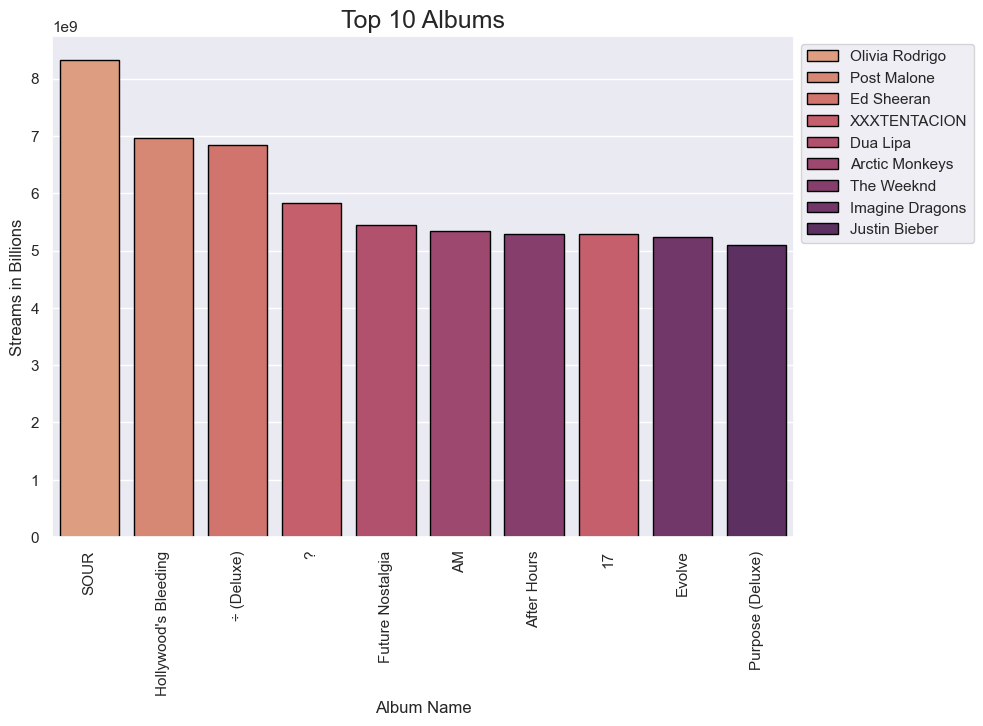

In [199]:
# Data viz for to 10 albums
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')

sns.barplot(data= top10albums, x='album', y='total_streams', hue='artist',edgecolor='black', linewidth=1, palette='flare')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout() 
plt.xticks(rotation=90)
plt.title('Top 10 Albums', size=18)
plt.ylabel('Streams in Billions')
plt.xlabel('Album Name')
plt.show()

In [215]:
top10singles.head(10)

,track,album_type,artist,total_streams
0,Closer,single,The Chainsmokers,2.456205e+09
1,lovely (with Khalid),single,Khalid,2.110574e+09
2,Happier,single,Marshmello,1.798355e+09
3,One Kiss (with Dua Lipa),single,Dua Lipa,1.719434e+09
4,Don't Let Me Down,single,The Chainsmokers,1.649896e+09
5,See You Again (feat. Charlie Puth),single,Wiz Khalifa,1.521255e+09
6,Heathens,single,Twenty One Pilots,1.475768e+09
7,Old Town Road - Remix,single,Billy Ray Cyrus,1.393903e+09
8,This Is What You Came For,single,Rihanna,1.389244e+09
9,death bed (coffee for your head),single,beabadoobee,1.386081e+09


In [200]:
top10singles.describe()

,total_streams
count,1.000000e+01
mean,1.690071e+09
std,3.532441e+08
min,1.386081e+09
25%,1.414370e+09
50%,1.585575e+09
75%,1.778625e+09
max,2.456205e+09


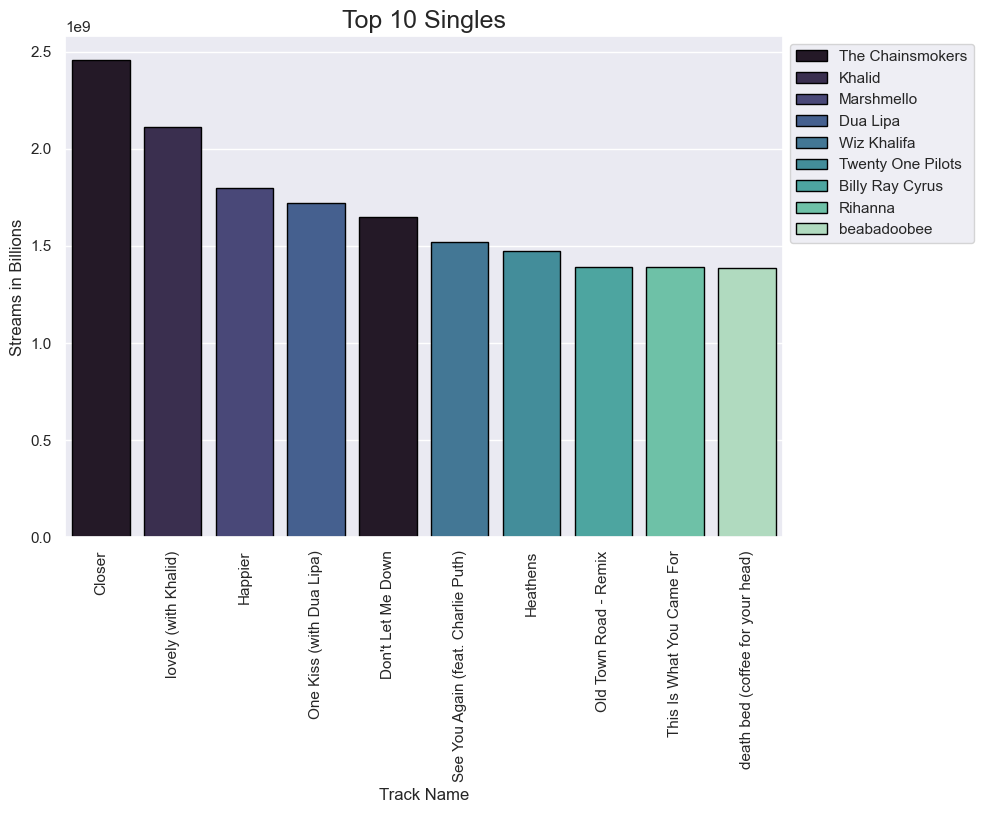

In [209]:
# Data viz for to 10 singles
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')

sns.barplot(data=top10singles, x='track', y='total_streams', hue='artist', edgecolor='black', linewidth=1, palette='mako')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Top 10 Singles', size=18)
plt.ylabel('Streams in Billions')
plt.xlabel('Track Name')
plt.show()


In [212]:
top10artists.head(10)

,artist,total_streams
0,Post Malone,1.525126e+10
1,Ed Sheeran,1.439488e+10
2,Dua Lipa,1.340808e+10
3,XXXTENTACION,1.322435e+10
4,The Weeknd,1.303197e+10
5,Justin Bieber,1.209777e+10
6,Imagine Dragons,1.185831e+10
7,Coldplay,1.177848e+10
8,Khalid,1.138684e+10
9,Bruno Mars,1.089786e+10


In [213]:
top10artists.describe()

,total_streams
count,1.000000e+01
mean,1.273298e+10
std,1.380404e+09
min,1.089786e+10
25%,1.179844e+10
50%,1.256487e+10
75%,1.336215e+10
max,1.525126e+10


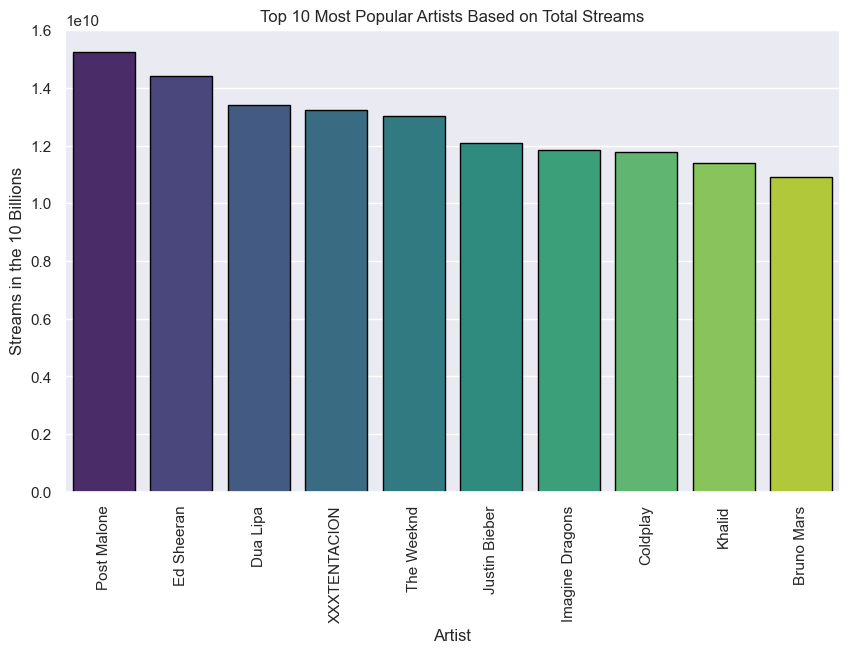

In [218]:
plt.figure(figsize=(10,6))

sns.barplot(data=top10artists, x='artist', y='total_streams', palette='viridis', hue='artist', edgecolor='black', linewidth=1)

plt.ylabel('Streams in the 10 Billions')
plt.xlabel('Artist')
plt.title('Top 10 Most Popular Artists Based on Total Streams')
plt.xticks(rotation=90)
plt.show()

In [219]:
rankedsongs.head()

,artist,song,total_streams,artist_rank,song_rank
0,Post Malone,rockstar (feat. 21 Savage),2.594927e+09,1,1
1,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09,1,2
2,Post Malone,Circles,1.958827e+09,1,3
3,Post Malone,Better Now,1.694008e+09,1,4
4,Post Malone,Congratulations,1.685298e+09,1,5


In [220]:
rankedsongs.describe()

,total_streams,artist_rank,song_rank
count,5.000000e+01,50.000000,50.000000
mean,1.747126e+09,5.500000,3.000000
std,5.144458e+08,2.901442,1.428571
min,1.044984e+09,1.000000,1.000000
25%,1.365438e+09,3.000000,2.000000
50%,1.638219e+09,5.500000,3.000000
75%,2.017086e+09,8.000000,4.000000
max,3.386520e+09,10.000000,5.000000


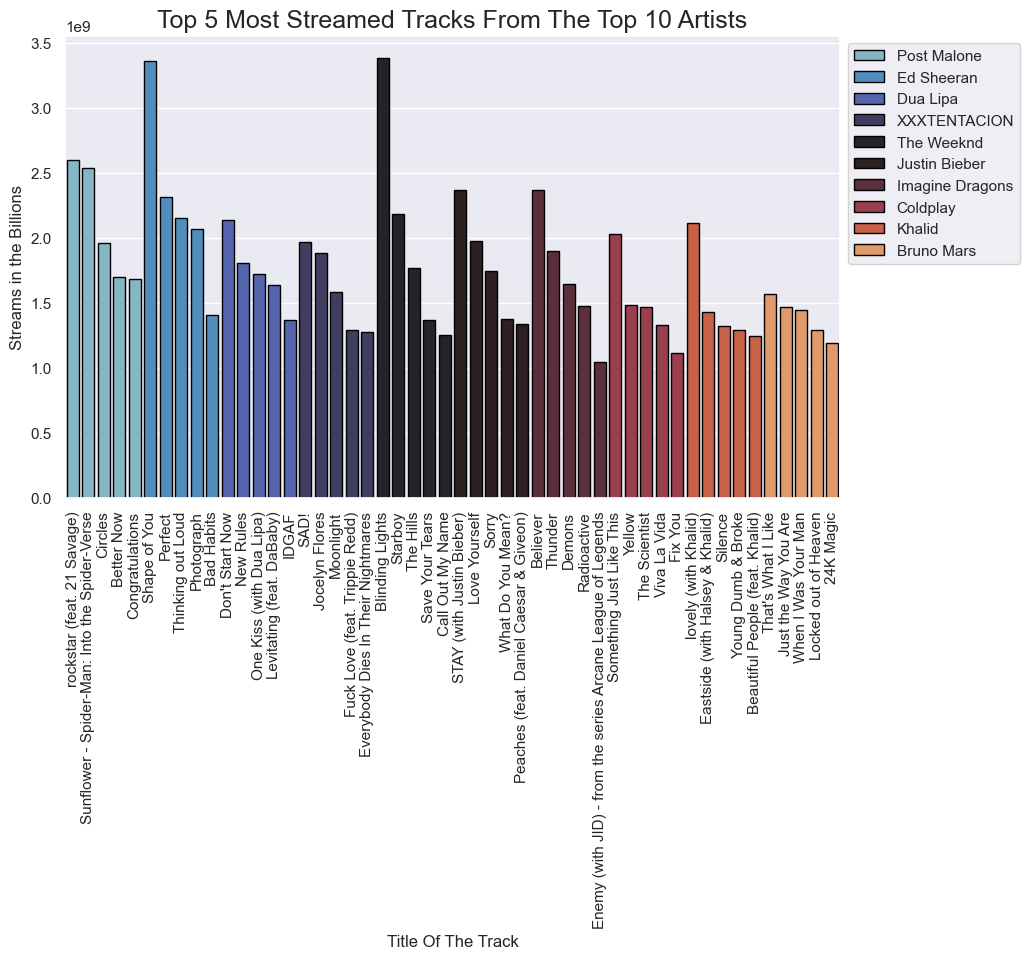

In [228]:
plt.figure(figsize=(10, 6))

sns.barplot(data=rankedsongs, x='song', y='total_streams', hue='artist', edgecolor='black', linewidth=1, palette='icefire')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.ylabel('Streams in the Billions')
plt.xlabel('Title Of The Track')
plt.title('Top 5 Most Streamed Tracks From The Top 10 Artists', size=18)
plt.xticks(rotation=90)
plt.show()

<div style='background-color:lightyellow; padding:10px'>
<p>This completes the formal visualizations for this project.</p>
<p>Next I will complete several visualizations on variables from the data set that I find interesting</p>

In [230]:
general = pd.read_sql_query('''
SELECT * 
FROM [Spotify].dbo.spotify
''',connect)

general.head(1)

,artist,track,album,album_type,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,title,channel,views,likes,comments,licensed,official_video,stream,energyliveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.177,0.00836,0.00233,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify


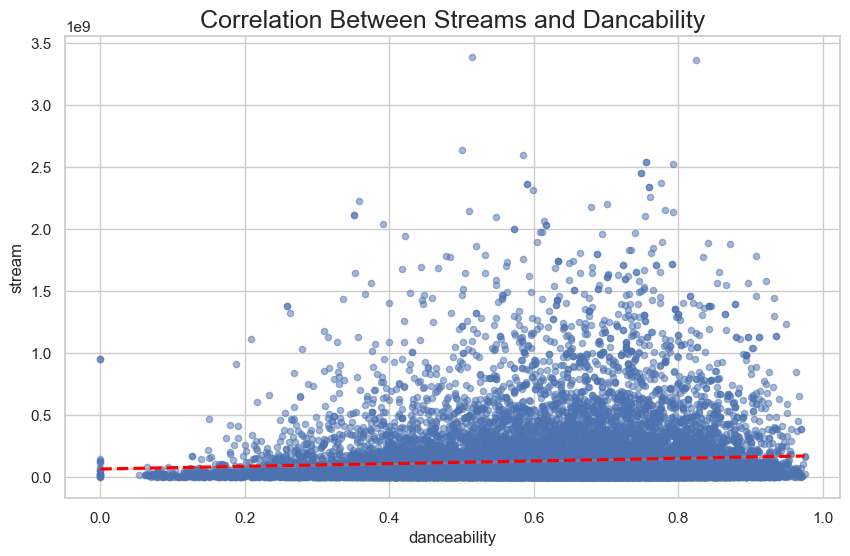

In [252]:
plt.figure(figsize=(10, 6))

sns.set_theme(style='whitegrid')

sns.regplot(data=general, x='danceability', y='stream',
            scatter_kws={'s': 20,'alpha':.5}, line_kws={'color': 'red', 'linestyle':'--'})

plt.title('Correlation Between Streams and Dancability', size=18)

plt.show()

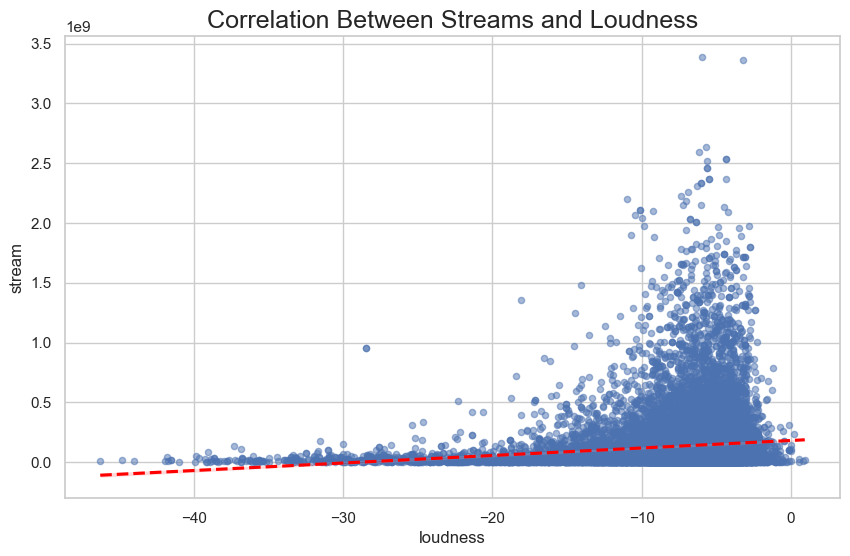

In [254]:
plt.figure(figsize=(10, 6))

sns.set_theme(style='whitegrid')

sns.regplot(data=general, x='loudness', y='stream',
            scatter_kws={'s': 20,'alpha':.5}, line_kws={'color': 'red', 'linestyle':'--'})

plt.title('Correlation Between Streams and Loudness', size=18)

plt.show()

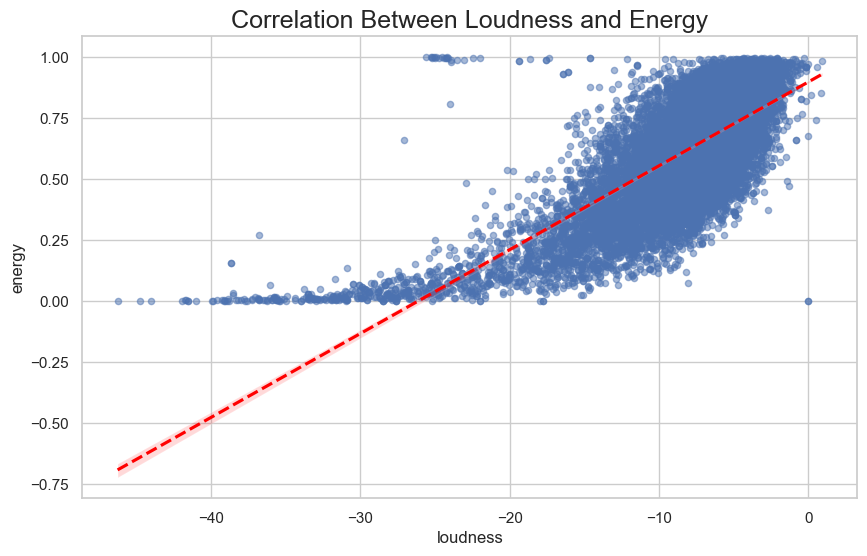

In [256]:
plt.figure(figsize=(10, 6))

sns.set_theme(style='whitegrid')

sns.regplot(data=general, x='loudness', y='energy',
            scatter_kws={'s': 20,'alpha':.5}, line_kws={'color': 'red', 'linestyle':'--'})

plt.title('Correlation Between Loudness and Energy', size=18)

plt.show()

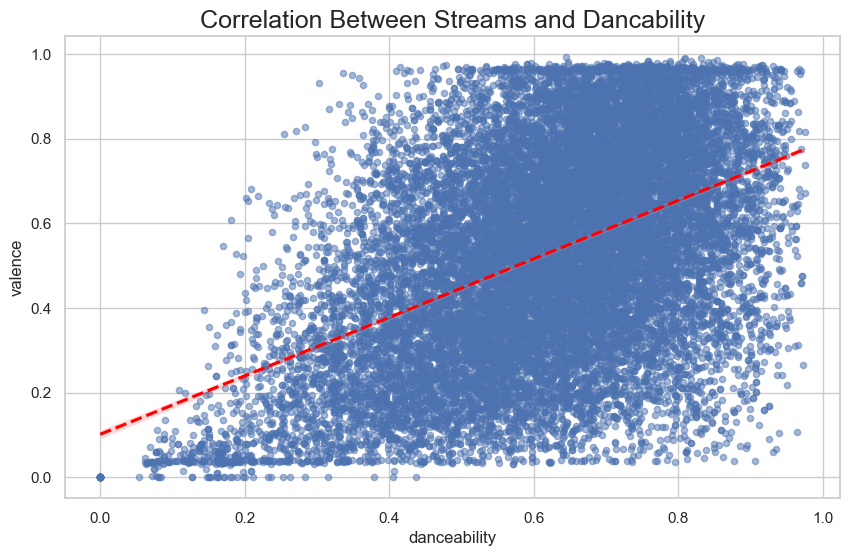

In [257]:
plt.figure(figsize=(10, 6))

sns.set_theme(style='whitegrid')

sns.regplot(data=general, x='danceability', y='valence',
            scatter_kws={'s': 20,'alpha':.5}, line_kws={'color': 'red', 'linestyle':'--'})

plt.title('Correlation Between Valence and Dancability', size=18)

plt.show()

<div style='background-color: #00296b; color: #ffffff; border-radius: 10px; border: 2px solid black; padding: 10px;'>
<h2>Excel & Tableau Dashboard</h2>
</div>

Access the Excel Dashboard through the files section in this repo.

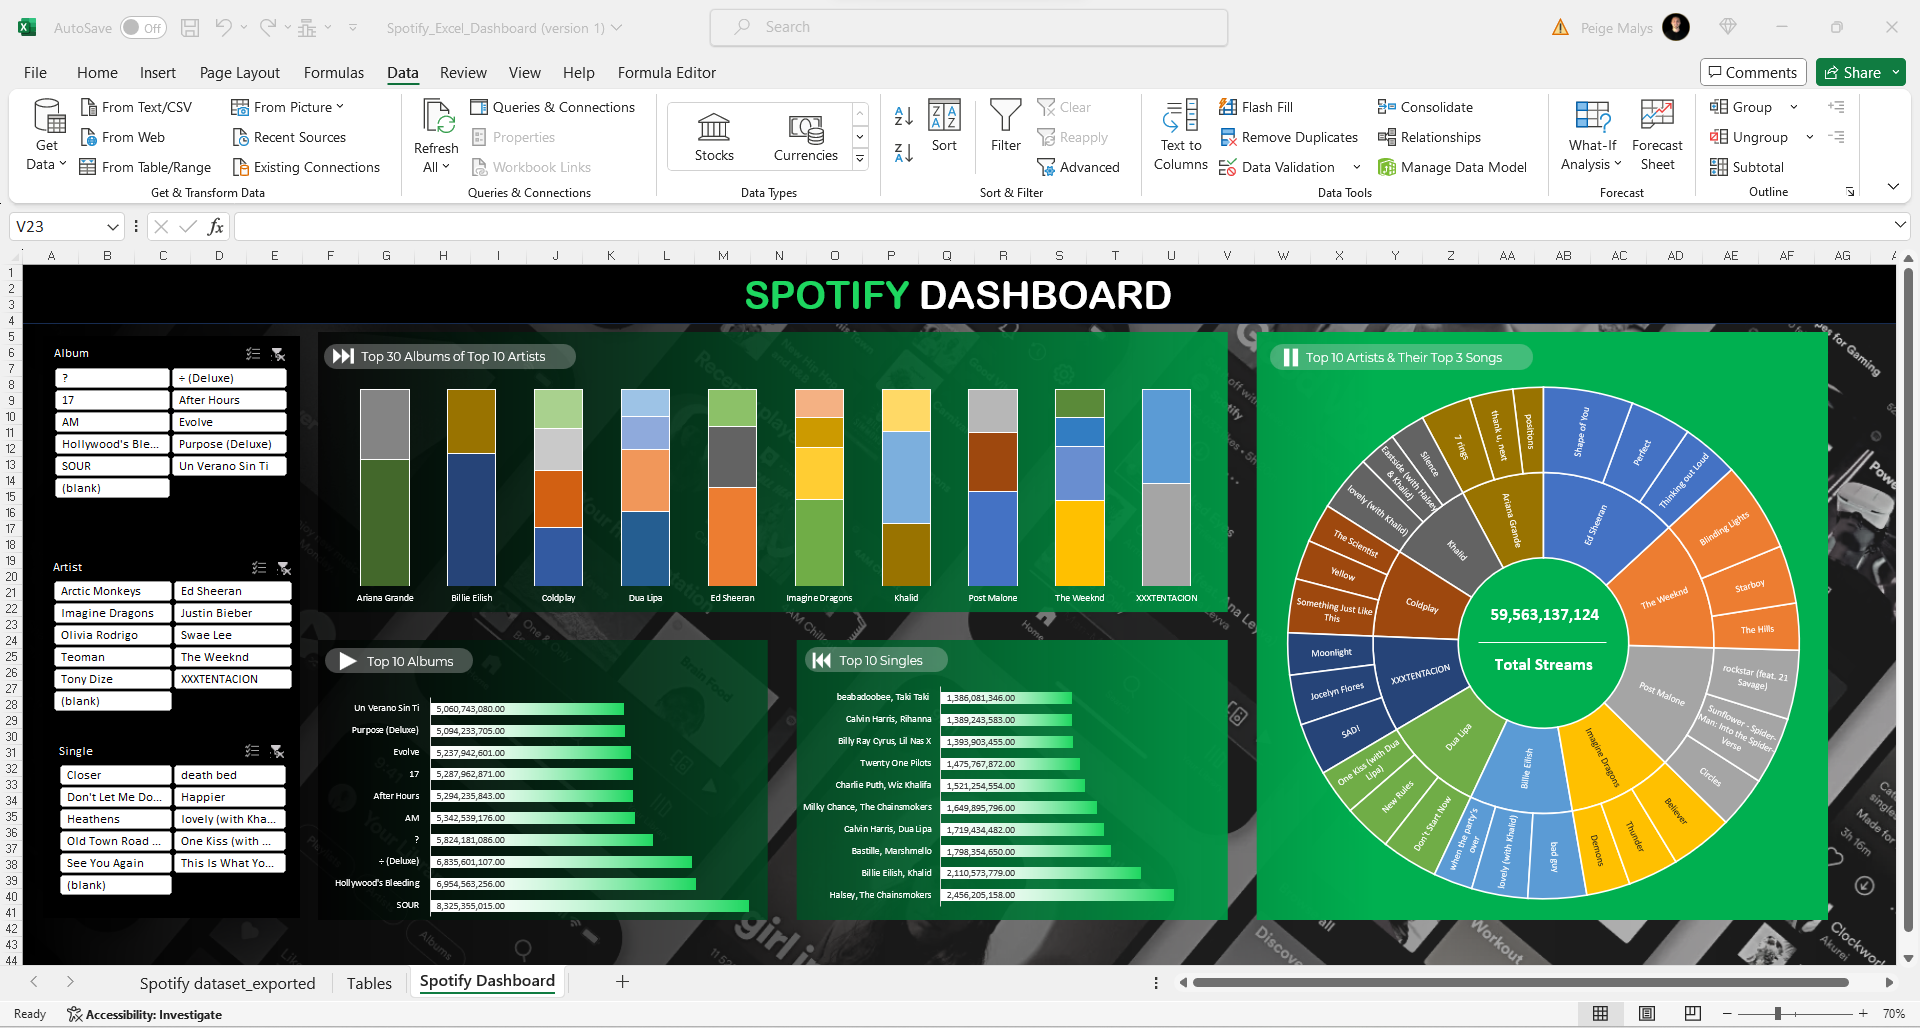

<div style='background-color: #00296b; color: #ffffff; border-radius: 10px; border: 2px solid black; padding: 10px;'>
<h2>Conclusions</h2>
</div>

<p>Our original project objectives and goals:</p>
    <ul>
        <li>Identify the top 10 most streamed albums</li>
        <li>Identify the top 10 most streamed singles</li>
        <li>Identify the top 10 most popular atrists based on streams</li>
        <li>Identify the top 5 most streamed songs from the top 10 artists</li>
        <li>Determine what variables <strong><i>(if any)</i></strong> have a direct impact on the number of streams a song receives</li>
    </ul>

<strong>Identify the top 10 most streamed albums:</strong>
The top 10 most streamed albums are: SOUR, Hollywood's Bleeding, ÷ (Deluxe), ?, Future Nostalgia, AM, After Hours, 17, Evolve, Purpose (Deluxe).
<br>
<br>
<strong>Identify the top 10 most streamed singles:</strong>
The top 10 most streamed singles: Closer, lovely (with Khalid), Happier, One Kiss (with Dua Lipa), Don't Let Me Down, See You Again (feat. Charlie Puth), Heathens, Old Town Road - Remix, This Is What You Came For, death bed (coffee for your head).
<br>
<br>
<strong>Identify the top 10 most popular atrists based on streams:</strong>
Based our our analysis the top 10 most streamed artists are: Post Molone, Ed Sheeran, Dua Lipa, XXXTENTACION, The Weekend, Justin Beiber, Imagine Dragons, Coldplay, Khalid and Bruno Mars

In [290]:
print('Identify the top 5 most streamed songs from the top 10 artists:\n')

for index, row in rankedsongs.iterrows():
    print(f"Artist: {row['artist']}, Song: {row['song']}")

Identify the top 5 most streamed songs from the top 10 artists:

Artist: Post Malone, Song: rockstar (feat. 21 Savage)
Artist: Post Malone, Song: Sunflower - Spider-Man: Into the Spider-Verse
Artist: Post Malone, Song: Circles
Artist: Post Malone, Song: Better Now
Artist: Post Malone, Song: Congratulations
Artist: Ed Sheeran, Song: Shape of You
Artist: Ed Sheeran, Song: Perfect
Artist: Ed Sheeran, Song: Thinking out Loud
Artist: Ed Sheeran, Song: Photograph
Artist: Ed Sheeran, Song: Bad Habits
Artist: Dua Lipa, Song: Don't Start Now
Artist: Dua Lipa, Song: New Rules
Artist: Dua Lipa, Song: One Kiss (with Dua Lipa)
Artist: Dua Lipa, Song: Levitating (feat. DaBaby)
Artist: Dua Lipa, Song: IDGAF
Artist: XXXTENTACION, Song: SAD!
Artist: XXXTENTACION, Song: Jocelyn Flores
Artist: XXXTENTACION, Song: Moonlight
Artist: XXXTENTACION, Song: Fuck Love (feat. Trippie Redd)
Artist: XXXTENTACION, Song: Everybody Dies In Their Nightmares
Artist: The Weeknd, Song: Blinding Lights
Artist: The Weeknd, 

<strong>Determine what variables <strong><i>(if any)</i></strong> have a direct impact on the number of streams a song receives:</strong>

Based on our analysis and heatmap the only other variables that affected streams were: views, comments and likes.